<a href="https://colab.research.google.com/github/binhluong84/Machine-Learning/blob/main/CAT_Scan_Location_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connect Google Drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf

In [3]:
data = pd.read_csv('/gdrive/MyDrive/CAT Scan Localization/slice_localization_data.csv.zip')

In [4]:
data

,patientId,value0,value1,value2,value3,value4,value5,value6,value7,value8,...,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,...,-0.25,0.980381,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.803851
1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,...,-0.25,0.977008,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.745726
2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,...,-0.25,0.977008,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.687600
3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,...,-0.25,0.977008,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.629474
4,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,...,-0.25,0.976833,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.571348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53495,96,0.591906,0.357764,0.000000,0.000000,0.552321,0.795304,0.946697,0.952227,0.84395,...,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,29.290398
53496,96,0.612313,0.000000,0.000000,0.000000,0.864160,0.820531,0.000000,0.938813,0.94374,...,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,27.945721
53497,96,0.612313,0.000000,0.000000,0.000000,0.864160,0.820531,0.000000,0.938813,0.94374,...,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,27.945721
53498,96,0.634921,0.904555,0.956087,0.980208,0.157664,0.000000,-0.250000,-0.250000,-0.25000,...,-0.25,0.000000,0.0,0.994967,0.806688,0.0,0.0,-0.25,-0.25,14.582997


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53500 entries, 0 to 53499
Columns: 386 entries, patientId to reference
dtypes: float64(385), int64(1)
memory usage: 157.6 MB


In [6]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop patientId column
    df = df.drop('patientId', axis=1)
    
    # Split df into X and y
    y = df['reference']
    X = df.drop('reference', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    return X_train, X_test, y_train, y_test

In [7]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [8]:
X_train

,value0,value1,value2,value3,value4,value5,value6,value7,value8,value9,...,value374,value375,value376,value377,value378,value379,value380,value381,value382,value383
36958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,-0.250000,-0.25,...,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.998727,0.999059,0.00,-0.25
20128,0.000000,0.000000,0.709849,0.887755,0.000000,0.000000,0.000000,0.00,0.000000,-0.25,...,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.00
33249,0.097561,0.101777,0.000000,0.000000,0.229446,0.000000,0.000000,0.00,0.971077,-0.25,...,0.00,0.00,0.860490,0.998998,0.999965,0.99984,0.000000,0.000000,0.00,0.00
33896,0.000000,0.015177,0.000000,0.023474,0.000000,0.000000,0.000000,0.00,0.000000,-0.25,...,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.00
15142,0.000000,0.097826,0.870466,0.893671,0.000000,0.000000,0.000000,-0.25,-0.250000,-0.25,...,0.00,-0.25,0.992206,0.000000,0.000000,0.00000,0.000000,0.000000,-0.25,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,0.000000,0.000000,0.000000,0.000000,0.869092,0.890979,0.000000,0.00,0.000000,-0.25,...,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.00
32511,0.000000,0.000000,0.803598,0.000000,0.000000,-0.250000,-0.250000,-0.25,-0.250000,-0.25,...,-0.25,-0.25,0.000000,0.000000,0.000000,0.00000,0.000000,-0.250000,-0.25,-0.25
5192,0.000000,0.000000,0.000000,0.000000,0.594512,0.566795,0.185011,0.00,-0.250000,-0.25,...,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,-0.25
12172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,-0.25,...,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,-0.25


In [9]:
y_train

36958    53.168322
20128    78.796527
33249    34.740313
33896    29.947560
15142    15.880591
           ...    
50057    74.919418
32511    23.360237
5192     63.332494
12172    68.634920
33003    55.135923
Name: reference, Length: 37450, dtype: float64

In [10]:
X_train.shape

(37450, 384)

In [11]:
inputs = tf.keras.Input(shape=384,)
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='mse'
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
937/937 [==============================] - 6s 5ms/step - loss: 131.2253 - val_loss: 22.5810
Epoch 2/100
937/937 [==============================] - 3s 3ms/step - loss: 14.4917 - val_loss: 8.8881
Epoch 3/100
937/937 [==============================] - 3s 3ms/step - loss: 6.7920 - val_loss: 5.1909
Epoch 4/100
937/937 [==============================] - 3s 3ms/step - loss: 4.0396 - val_loss: 3.5645
Epoch 5/100
937/937 [==============================] - 3s 3ms/step - loss: 2.9317 - val_loss: 3.0574
Epoch 6/100
937/937 [==============================] - 3s 3ms/step - loss: 2.1205 - val_loss: 2.2968
Epoch 7/100
937/937 [==============================] - 3s 3ms/step - loss: 1.7239 - val_loss: 2.3084
Epoch 8/100
937/937 [==============================] - 3s 3ms/step - loss: 1.5161 - val_loss: 1.8575
Epoch 9/100
937/937 [==============================] - 3s 3ms/step - loss: 1.2898 - val_loss: 1.9205
Epoch 10/100
937/937 [==============================] - 3s 3ms/step - loss: 1.1286 - va

In [12]:
y_pred = np.squeeze(model.predict(X_test))

502/502 [==============================] - 1s 1ms/step


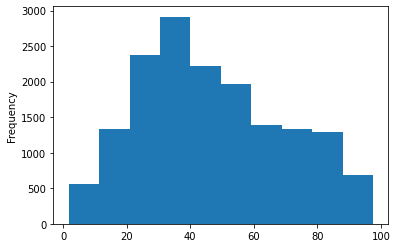

In [13]:
y_test.plot(kind='hist')

In [14]:
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print("RMSE: {:.5f}".format(rmse))

r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))
print("R^2 Score: {:.5f}".format(r2))

RMSE: 0.72253
R^2 Score: 0.99896
